In [1]:
library(IRdisplay)
library(Cairo)

library(data.table)
library(arrow)
library(ggplot2)
library(cowplot)
library(ggrepel)
library(ggthemes)
library(ggpubr)
library(ggtext)
library(patchwork)
library(grid)
library(gridExtra)
library(scales)
library(stringr)
library(RColorBrewer)
library(yaml)
library(plyr)
library(tidyverse)
library(png)
library(rstatix)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()      masks plyr::arrange()
✖ dplyr::between()      masks data.table::between()
✖ readr::col_factor()   masks scales::col_factor()
✖ dplyr::combine()      masks gr

In [3]:
# set global plot parameters
FONTSIZE = 12
THEME = theme_cowplot(font_size = FONTSIZE, font_family = 'Helvetica') + theme(plot.tag = element_text(face = "bold"))

In [4]:
output_path = '/data/nasif12/home_if12/tsi/projects/kipoi_veff_analysis/plots'
enrichment_df = open_dataset('promoter_enrichment.parquet') %>% collect() %>% as.data.table()
veff_df = open_dataset('promoter_veff_bin.parquet') %>% collect() %>% as.data.table()

In [5]:
label_start_pos = 0.3
label_distance = 0.05
# Define the y-positions for each outlier state
outlier_state_y_positions <- c(
  "normal" = label_start_pos + label_distance,
  "underexpressed" = label_start_pos,
  "overexpressed" = label_start_pos + 2*label_distance
)

# Add the new y-position column based on outlier_state
enrichment_df <- enrichment_df %>%
  mutate(count_pos = outlier_state_y_positions[as.character(outlier_state)])

In [6]:
log10_math_format <- function(x) {
  exponent <- floor(log10(x))
  base <- round(x / 10^exponent, 0)
  if (exponent < 4) {
      return(x)
  } else if (base == 1) {
    return(bquote(10^.(exponent)))  # 10^x format when base is 1
  }  else {
    return(bquote(.(base) %*% 10^.(exponent)))  # Base * 10^x format
  }
}

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


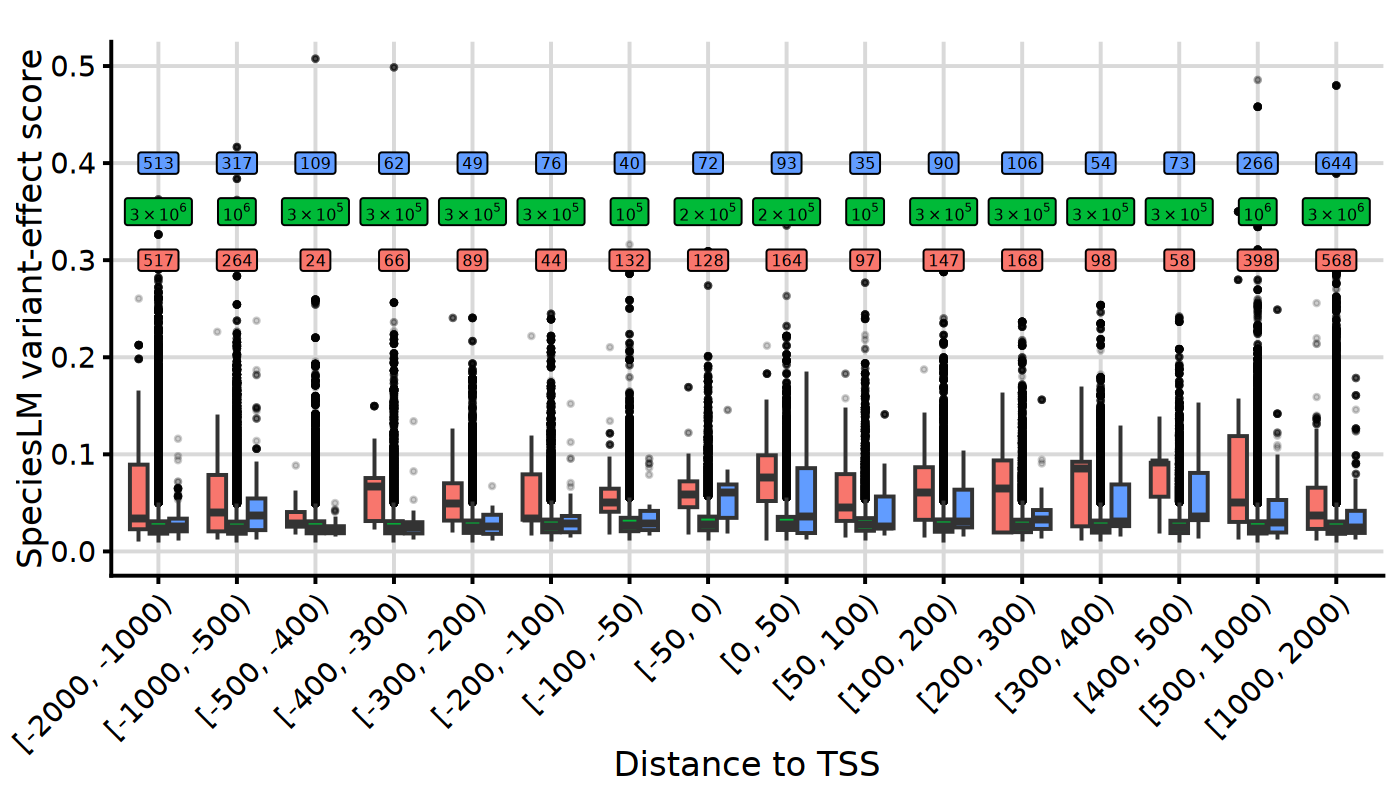

In [7]:
options(repr.plot.width=7, repr.plot.height=4, repr.plot.res=200)
p1 = (
    ggplot(veff_df, aes(x=`tss_distance_bin_label`, fill=`outlier_state`))
    + geom_boxplot(aes(y=-`veff_score`), outlier.size=0.5, outlier.color='#00000032', show.legend = FALSE)
    + THEME
    + theme(
        axis.text.x=element_text(angle = 45, hjust = 1),
        legend.position = c(0.7, 0.9),
        legend.margin=margin(-15,15,2,2),
        legend.background=element_rect(fill='white', color='black', linewidth=0.3)
    )
    + labs(
        x="Distance to TSS", 
        y=bquote("SpeciesLM variant-effect score"),
        color="",
        fill="",
        title=element_blank(),
    )
    + coord_cartesian(ylim=c(0, 0.5))
    + guides(size='none', fill = guide_legend(reverse = TRUE))
    + background_grid()
    + geom_label(data=enrichment_df, aes(label=sapply(`count`, log10_math_format), y=`count_pos`), size=2, color="black", parse=TRUE, show.legend=FALSE)  # Add count labels, adjust y to place below
    )
p1

In [8]:
width=7
height=4

path = paste(output_path, 'lm_promoter_bins', sep='/')
print(paste0("Saving to ", path, "..."))
ggsave(paste0(path, ".png"), p1, width = width, height = height, dpi=600, type='cairo')

[1] "Saving to /data/nasif12/home_if12/tsi/projects/kipoi_veff_analysis/plots/lm_promoter_bins..."


Warning message:
“Using ragg device as default. Ignoring `type` and `antialias` arguments”
